<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

hh_df=pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')  # Reading data into a dataframe hh_df. Delimiter ";"

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [33]:
hh_df.sample(5)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
1482,"Мужчина , 42 года , родился 8 октября 1976",85000 руб.,Руководитель отдела ИТ / ведущий системный ин...,"Санкт-Петербург , не готов к переезду , готов ...",полная занятость,полный день,Опыт работы 12 лет 2 месяца Май 2017 — Март ...,институт кино и телевидения,ведущий инженер,Высшее образование 2010 Институт точной механи...,06.04.2019 18:55,Не указано
27723,"Мужчина , 33 года , родился 20 декабря 1985",200000 руб.,Senior Traffic Manager,"Москва , м. Коломенская , не готов к переезду...","частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы 4 года 11 месяцев Октябрь 2018 — ...,Revenuelab,Senior Traffic Manager,Высшее образование 2010 Омский государственны...,06.04.2019 14:43,Не указано
36901,"Мужчина , 24 года , родился 23 декабря 1994",130000 руб.,Эксперт MS Excel/VBA,"Москва , не готов к переезду , не готов к кома...","частичная занятость, проектная работа","гибкий график, сменный график, удаленная работа",Опыт работы 2 года 3 месяца Эксперт MS Excel/...,EY Russia,Специалист по автоматизации бизнес-операций,Высшее образование 2016 Российский государств...,22.04.2019 15:36,Не указано
38507,"Мужчина , 23 года , родился 4 мая 1996",30000 руб.,"Менеджер, сотрудник, специалист","Самара , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 2 года 6 месяцев Октябрь 2017 — п...,Нету,Фриланс по сборке ПК,Высшее образование 2018 Поволжский государств...,07.05.2019 14:40,Не указано
20964,"Мужчина , 36 лет , родился 27 июня 1982",1 руб.,Директор по продажам /Руководитель отдела продаж,"Москва , м. Комсомольская , не готов к переез...",полная занятость,полный день,Опыт работы 13 лет 10 месяцев Директор по про...,Марвел,начальник отдела Huawei Enterprise,Высшее образование 2006 Московский авиационны...,25.04.2019 13:45,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [34]:
print(hh_df.isnull().sum())

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64


4. Обратите внимание на информацию о числе непустых значений.

In [35]:
print(hh_df.shape)


(44744, 12)


5. Выведите основную статистическую информацию о столбцах.


In [36]:
print(hh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [37]:
def get_edu(edu):
    """
**get_edu** for creating a new attribute "Образование",
**edu** - attribute "Образование и ВУЗ" from the dataframe
    """

    edu_list=edu.split(' ')                     # reading data to list, delim. is ' '
    edu_type=edu_list[0:2]                      # reading first 2 values
    if edu_type[-1]=='образование':             # if 2-nd value is 'образование'
        edu_type=edu_type[0]                    # writing first value into edu_type. e.g. "Среднее"
    else:
        edu_type=" ".join(edu_list[0:2])        # concatenate 2 values. e.g. "Неоконченное высшее"
    return edu_type.lower()                     # ret. data in lower case as specified in the task description
edu=hh_df['Образование и ВУЗ'].apply(get_edu)   # applying a function to process data
print(edu.value_counts())                       # checking received values
hh_df['Образование']=edu                        # writing new category
hh_df=hh_df.drop('Образование и ВУЗ',axis=1)    # deleting old category

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование и ВУЗ, dtype: int64


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [38]:
def sex_age(mix_sex_age,ret_type='a'):
    """
**sex_age** for creating a new attributes "Пол","Возраст",
**mix_sex_age** - attribute 'Образование и ВУЗ' from the dataframe,
**ret_type** - sign ("s"- sex, "a" or any singn - age)
    """

    sex_age_list=mix_sex_age.split(',')             # reading data to list, delim. is ','
    sex=list(sex_age_list[0])[0]                    # writing first char of the full name. e.g. 'Мужской'->'М'
    age=int(sex_age_list[1].split(' ')[2])          # writing and convert to int two char with age
    if ret_type!='s':                               # return value according to attribute
        return age
    return sex
sex=hh_df['Пол, возраст'].apply(sex_age,args='s')   # applying a function to process data for sex
age=hh_df['Пол, возраст'].apply(sex_age)            # applying a function to process data for age
hh_df['Пол']=sex                                    # writing new category
hh_df['Возраст']=age                                # writing new category
hh_df=hh_df.drop('Пол, возраст',axis=1)             # deleting old category
hh_df['Возраст']=hh_df['Возраст'].astype('int8')    # convert to int8 because 1 byte is enough for age

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [39]:
def exp_month_func(exp_draft):
    """
**exp_month_func** for creating a new attribute "Опыт работы (месяц)",
**exp_draft** - attribute 'Опыт работы' from the dataframe,
    """

    if type(exp_draft)!=str or exp_draft=="Не указано": #data check for RTN NaN
        return None
    exp_list=exp_draft.split(' ')[2:6]               # reading max possible values for further check
    if exp_list[3][0:3]=='мес':                      # if the filling is complete, conv years to months and add months
        return int(exp_list[0])*12+int(exp_list[2])
    if exp_list[1][0]=='г' or exp_list[1][0]=='л' :  # if there are no months in the data, conv years to months
        return int(exp_list[0])*12
    return int(exp_list[0])                          # return only the number of months

exp_month=hh_df['Опыт работы'].apply(exp_month_func) # applying a function to process data for experience
hh_df['Опыт работы (месяц)']=exp_month               # writing new category
hh_df=hh_df.drop('Опыт работы',axis=1)               # deleting old category



4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [40]:
def city_func(c_m_t):
    """
**city_func** for creating a new attribute "Город",
**c_m_t** - attribute 'Город, переезд, командировки' from the dataframe
    """

    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ] #list of million cities
    city=c_m_t.split(',')[0].strip()                    # reading first string to list and remove spaces
    if city in million_cities:                          # check if the city in million cities list
        return "город-миллионник"
    if city == 'Москва' or city == 'Санкт-Петербург':   # check if the city is 'Москва' or 'Санкт-Петербург'
        return city
    return 'другие'                                     # RTN other cities


def move_trip_func(c_m_t,ret_type='t'):
    """
**cmove_trip_func** for creating a new attribute "Город",
**c_m_t** - attribute 'Город, переезд, командировки' from the dataframe
**ret_type** - sign ("m"- readiness for move, "a" or any singn - readiness for business trip )
    """

    if ret_type=='m':                           # data preparation for moving
        move=c_m_t.split(',')[1].strip()        # reading 2-nd string from list and remove spaces
        move_g=move[0:2]                        # prepare 2 chars for processing
        if move_g =='м.':                       # if string have subway name, read next string
            move=c_m_t.split(',')[2].strip()
            move_g=move[0:2]
    if ret_type != 'm':                         # data preparation for business trip
        move=c_m_t.split(',')[-1].strip()       # reading last string from list and remove spaces
        move_g=move[0:2]                        # prepare 2 chars for processing
    if move_g=='не':                            # if there is a negation in two characters, RTN False
        return False
    return True

# applying a functions to process data
city=hh_df['Город, переезд, командировки'].apply(city_func)
move=hh_df['Город, переезд, командировки'].apply(move_trip_func, args='m')
trip=hh_df['Город, переезд, командировки'].apply(move_trip_func)

# writing new categorys
hh_df['Город']=city
hh_df['Готовность к переезду']=move
hh_df['Готовность к командировкам']=trip

hh_df=hh_df.drop('Город, переезд, командировки',axis=1)     # deleting old category
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Занятость                        44744 non-null  object 
 3   График                           44744 non-null  object 
 4   Последнее/нынешнее место работы  44743 non-null  object 
 5   Последняя/нынешняя должность     44742 non-null  object 
 6   Обновление резюме                44744 non-null  object 
 7   Авто                             44744 non-null  object 
 8   Образование                      44744 non-null  object 
 9   Пол                              44744 non-null  object 
 10  Возраст                          44744 non-null  int8   
 11  Опыт работы (месяц)              44574 non-null  float64
 12  Город             

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [41]:
employment=['полная занятость', 'полный день',
            'частичная занятость', 'сменный график',  # all possible values that will also be new categories
            'проектная работа', 'волонтерство',         # in dataframe
            'удаленная работа', 'стажировка',
            'вахтовый метод', 'гибкий график']

empl_shed=hh_df['Занятость']+', '+hh_df['График']       # concatenation of values from dataframe


# iterate all possible values and writing each category with processed values
for _ in employment:
    hh_df[_]=empl_shed.apply(lambda x: _ in x)

# deleting old categorys
hh_df=hh_df.drop('Занятость',axis=1)
hh_df=hh_df.drop('График',axis=1)
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 
 7   Пол                              44744 non-null  object 
 8   Возраст                          44744 non-null  int8   
 9   Опыт работы (месяц)              44574 non-null  float64
 10  Город                            44744 non-null  object 
 11  Готовность к переезду            44744 non-null  bool   
 12  Готовность к коман

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [42]:
# fill the new dataframe with the names of currencies in the dataset,
# the name of the currency in ISO format, proportions and a description of the currency
df_temp = pd.DataFrame([['грн', 'UAH', 10, 'гривна'],
                        ['USD', 'USD', 1, 'доллар'],
                        ['EUR', 'EUR', 1, 'евро'],
                        ['бел.руб.', 'BYN', 1, 'белорусский рубль'],
                        ['KGS', 'KGS', 10, 'киргизский сом'],
                        ['сум', 'UZS', 10000, 'узбекский сум'],
                        ['AZN', 'AZN', 1, 'азербайджанский манат'],
                        ['KZT', 'KZT', 100, 'казахстанский тенге']],
                       columns=['curr', 'curr_iso', 'proportion', 'curr_desc'])

# reading data on exchange rates and deleting unnecessary columns
exch_rates_df=pd.read_csv('data/ExchangeRates.csv', sep=',')
exch_rates_df=exch_rates_df.drop(columns=['per','time','vol','proportion'],axis=1)

# bringing dates to one standard
hh_df['Обновление резюме']=pd.to_datetime(hh_df['Обновление резюме']).dt.date
exch_rates_df['date']=pd.to_datetime(exch_rates_df['date']).dt.date

# excretion from  column 'ЗП'  new column "Валюта", replace 'ЗП' for number and change type to float
hh_df['Валюта']=hh_df['ЗП'].apply(lambda x: x.split(' ')[-1])
hh_df['ЗП']=hh_df['ЗП'].apply(lambda x: x.split(' ')[0])
hh_df['ЗП']=hh_df['ЗП'].astype('float')

# attaching a dataframe by currency name
hh_df = hh_df.merge(df_temp,
                            how='left',
                            left_on='Валюта',
                            right_on='curr')

# attaching a dataframe with currency by iso currency name and date
hh_df = pd.merge(hh_df,exch_rates_df,
                            how='left',
                            left_on=['curr_iso','Обновление резюме'],
                            right_on=['currency','date'])

# deleting unnecessary columns
hh_df=hh_df.drop(columns=['curr_iso','currency',
                          'date','Валюта','curr',
                          'curr_desc'])

hh_df[['proportion', 'close']] = hh_df[['proportion', 'close']]. fillna (1)  # change the signs of NaN to 1
hh_df["ЗП (руб)"]=hh_df['ЗП']*hh_df['close']/hh_df['proportion'] # conversion to rubles and filling in the new column
hh_df=hh_df.drop(columns=['ЗП','proportion','close'], axis=1)           # deleting unnecessary columns

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64
0    30
Name: Возраст, dtype: int8


<AxesSubplot: xlabel='Возраст'>

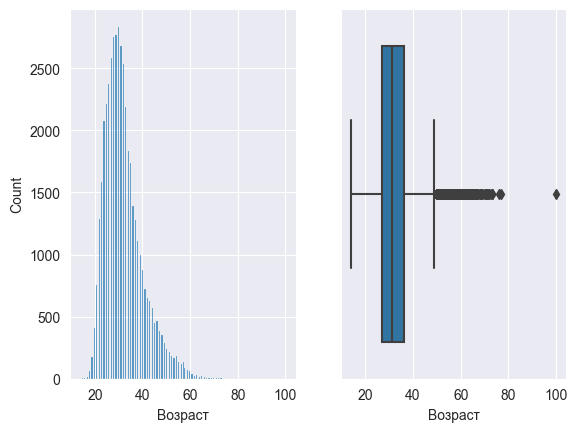

In [43]:
# main statistical values and mode
print(hh_df['Возраст'].describe())
print(hh_df['Возраст'].mode())

fig,axes = plt.subplots(1, 2)
sns.histplot(hh_df,x='Возраст', ax=axes[0])
sns.boxplot(hh_df, x='Возраст', ax=axes[1])

<span style="color:green">***Из анализа данных и графиков видно что среднее значение, медиана и мода очень близки по значениям - 32, 31 и 30 соответственно. Явный выброс это возраст 100 лет, минимальный возраст 14 лет - не является выбросом, правила сайта не запрещают размещение резюме несовершеннолетними***</span>

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64
0    81.0
Name: Опыт работы (месяц), dtype: float64


<AxesSubplot: xlabel='Опыт работы (месяц)'>

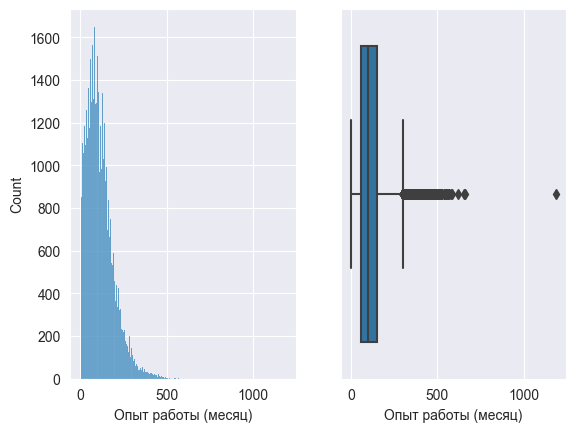

In [44]:
# main statistical values and mode
print(hh_df['Опыт работы (месяц)'].describe())
print(hh_df['Опыт работы (месяц)'].mode())

fig,axes = plt.subplots(1, 2)
sns.histplot(hh_df,x='Опыт работы (месяц)', ax=axes[0])
sns.boxplot(hh_df, x='Опыт работы (месяц)', ax=axes[1])

<span style="color:green">***1188 месяцев стажа это 99 лет. даже если принять за факт что у нас 100 летний соискатель реально существующий персонаж, то даже он не смог бы наработать такой стаж, соответственно явный выброс. с остальными данными можно работать***</span>

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


count    4.474400e+04
mean     7.646430e+04
std      1.359040e+05
min      1.000000e+00
25%      3.700000e+04
50%      5.835573e+04
75%      9.411250e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64
58355.729999999996


<AxesSubplot: xlabel='ЗП (руб)'>

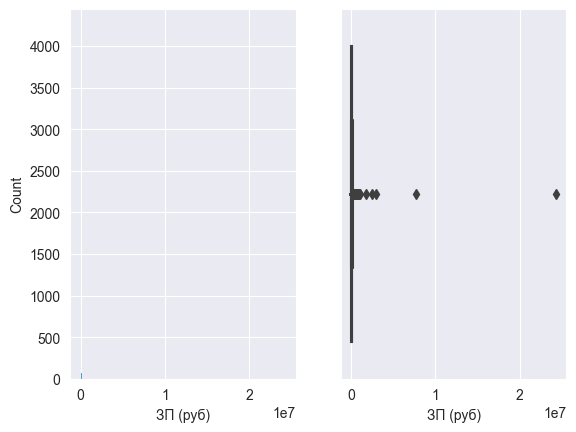

In [45]:
# main statistical values and mode
print(hh_df['ЗП (руб)'].describe())
print(hh_df['ЗП (руб)'].median())

fig,axes = plt.subplots(1, 2)
sns.histplot(hh_df,x='ЗП (руб)', ax=axes[0])
sns.boxplot(hh_df, x='ЗП (руб)', ax=axes[1])

<span style="color:green">*** на графике явно видно два выброса с ЗП больше 24 млн и около 10 млн. Так же видно что минимальное значение 1 рубль, что скорее всего так же является ошибкой***</span>

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

<AxesSubplot: xlabel='ЗП (руб)', ylabel='Образование'>

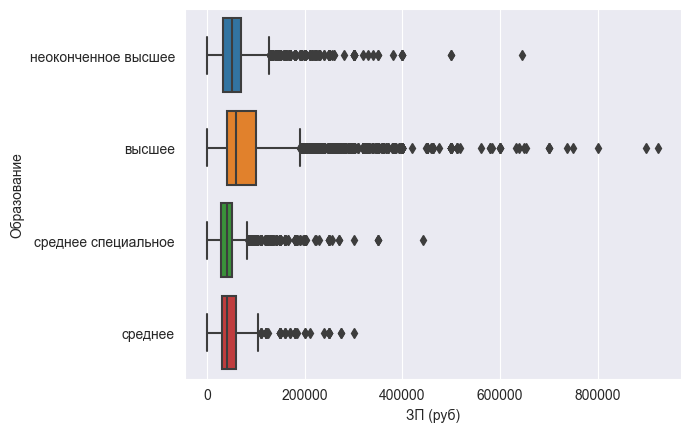

In [47]:
temp=hh_df.loc[hh_df['ЗП (руб)']<1000000]
sns.boxplot(x=temp['ЗП (руб)'], y=temp['Образование'])

<span style="color:green">*** на графике прослеживается зависимость желаемой зарплаты от уровня образования.  Чем выше уровень образрвания - тем выше зарплатные ожидания***</span>

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

<AxesSubplot: xlabel='ЗП (руб)', ylabel='Город'>

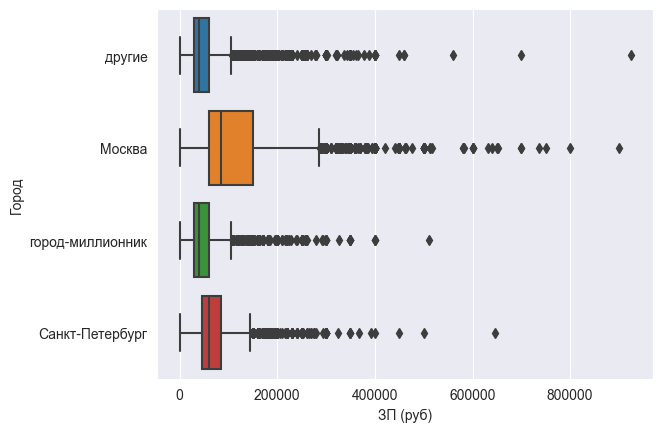

In [49]:
temp=hh_df.loc[hh_df['ЗП (руб)']<1000000]
sns.boxplot(x=temp['ЗП (руб)'], y=temp['Город'])

<span style="color:green">***Можно обратить внимание, что зарплатные ожидания в городах-миллионниках и других городах отличаются незначительно. далее по ранжиру идут Санкт-Петербург и Москва***</span>

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

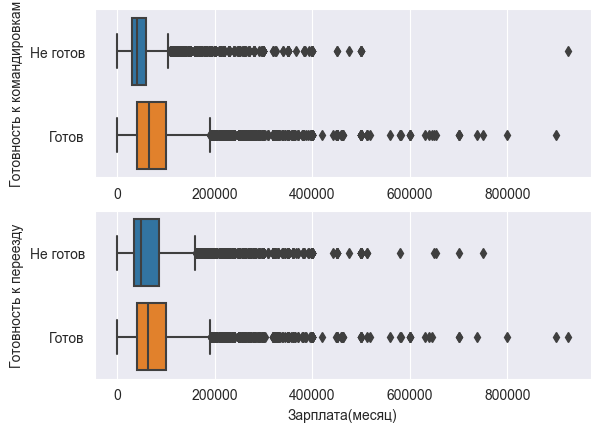

In [95]:
pd.options.mode.chained_assignment = None # Do not show a warning about possible errors when changing the dataframe

temp=hh_df.loc[hh_df['ЗП (руб)']<1000000]
temp['Готовность к переезду']=temp['Готовность к переезду'].\
    apply(lambda x: 'Готов' if x==True else 'Не готов')
temp['Готовность к командировкам']=temp['Готовность к командировкам'].\
    apply(lambda x: 'Готов' if x==True else 'Не готов')

fig,axes = plt.subplots(2, 1)
ax=sns.boxplot(hh_df,x='ЗП (руб)', y=temp['Готовность к командировкам'], ax=axes[0])
ax.set (xlabel='')
ax=sns.boxplot(hh_df,x='ЗП (руб)', y=temp['Готовность к переезду'], ax=axes[1])
ax.set (xlabel='Зарплата(месяц)')
plt.show()


<span style="color:green">*** медианы зарплат тех, кто готов к переезду и готов к командировке выше чем у не готовых***</span>

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# ваш код здесь

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
# ваш код здесь

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [12]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

ваш коммментарий здесь